Copyright (C) 2020 OERCompBiomed   

# Workshop on unsupervised learning

## Topics and learning outcome

- Example of supervised classification using K-Nearest Neighbour (KNN) - needs labeled data!
- Unsupervised learning with K-means - needs only data (not labels) and algorithmic hyperparmeters (e.g. K)
  - Toy examples for illustration
  - K-mean clustreing of real clinical data recorded from a patient with barin tumor (TCGA-GBM repository)

## Supervised classification

### Labeling of data:   producing pairs  $(\mathbf{x}_i, y_i)$  for $i=1,....,n$

where $\mathbf{x}_i = (x_{i1}, ... x_{ip})$, $p$ is number of features in each sample, and $n$ is number of samples in the labeled dataset.


### Four-channel multispectral image and associated training masks

A manually delineated training mask (cf. "labeling of data") consisting of 6 tissue types (color coded in  [R,G,B] space) as follows: 


 - AIR (air/compact bone) in Magenta [255,0,255]
 - GM  (gray matter) in Red  [255,0,0] 
 - WM  (white matter) in Cyan [0,255,255]
 - CSF (cerebrospinal fluid) in Blue [0,0,255]
 - MUS (muscle) in Green [0,255,0] 
 - FAT (fat) in Yellow [255,255,0]
 
and a manually delineated `head ROI mask` for spatial restriction of the supervised pixel classification.

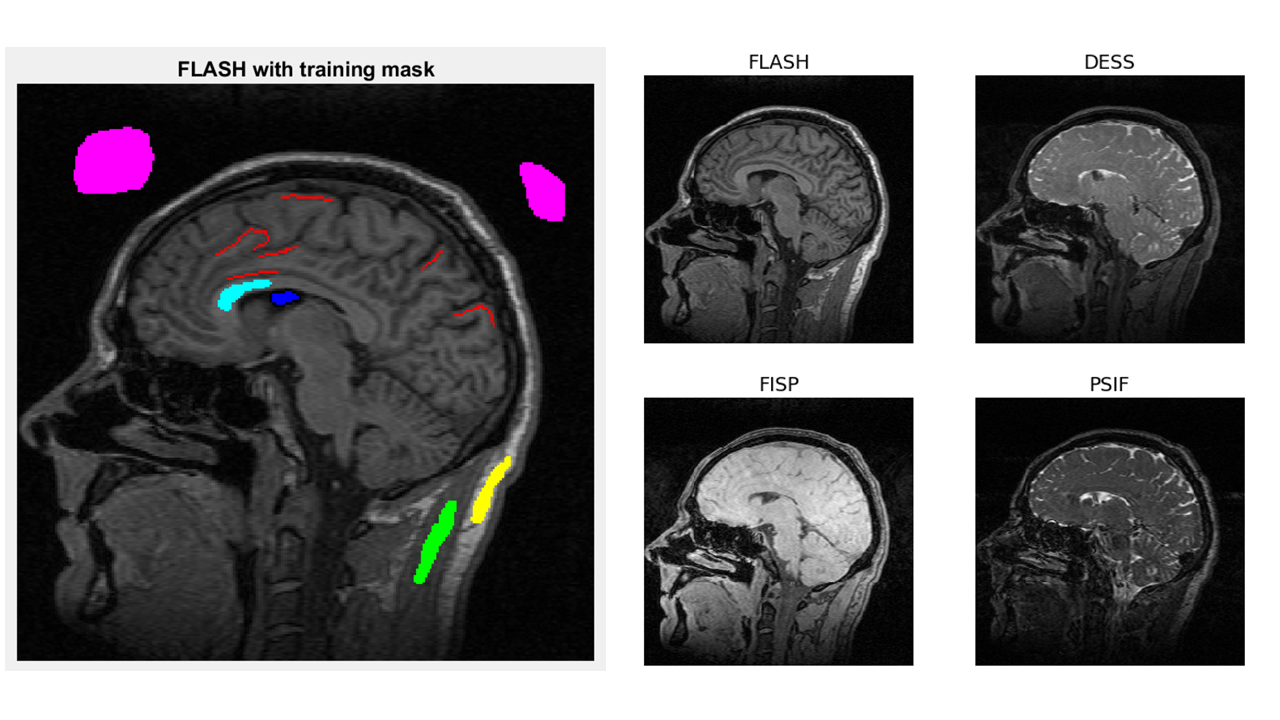

In [1]:
from IPython.display import Image
Image(filename='./assets/multispectral_tissue_classification_pptx.png', width=800)

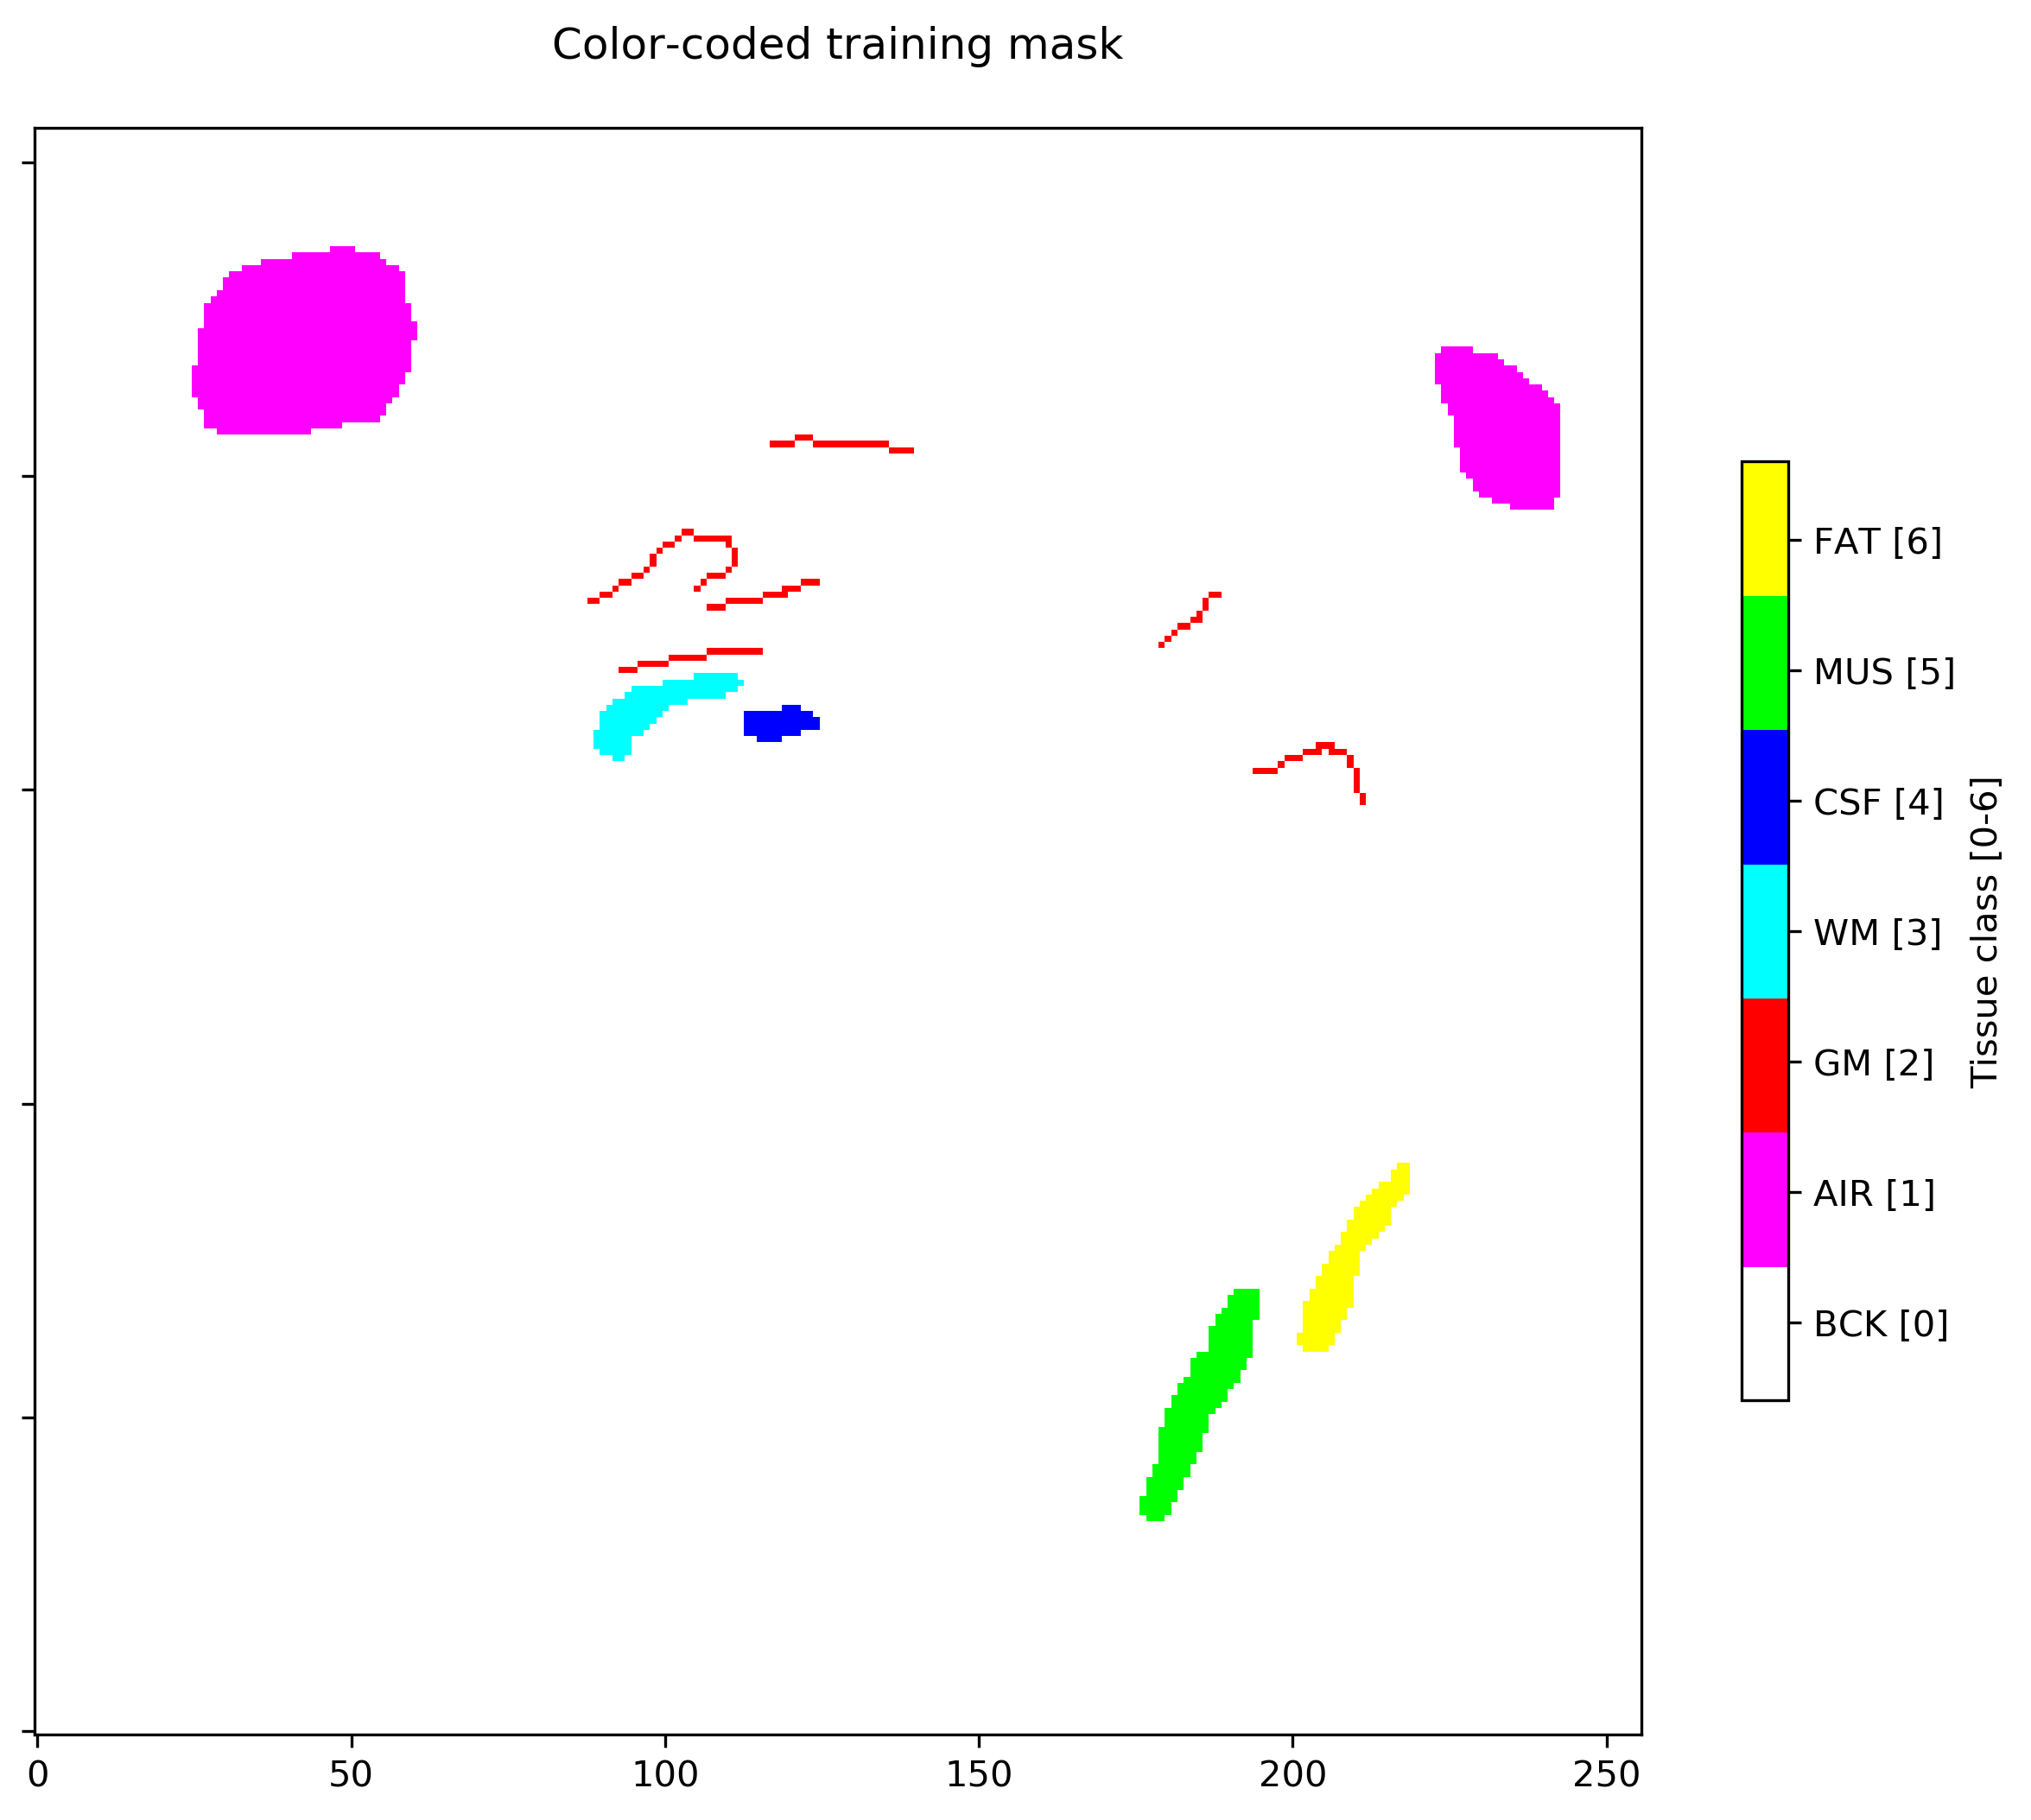

In [2]:
from IPython.display import Image
Image(filename='./assets/training_mask_1_6_color_coded.png', width=600)

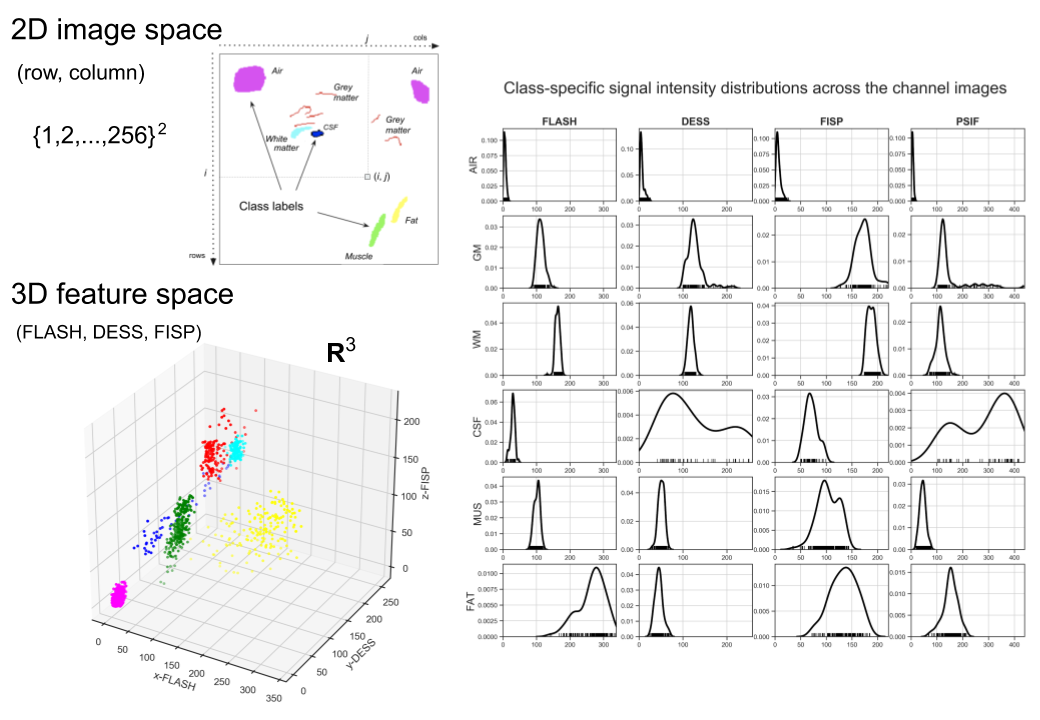

In [3]:
from IPython.display import Image
Image(filename='./assets/BMED_360_Lec1_introduction_mri_ip_image_space_feature_space.png', width=900)

## Theory:  K-nearest neighbor classication (KNN)

Short description and explanation of [KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)-classification:

In pattern recognition, the $K$-nearest neighbors algorithm (K-NN) is a non-parametric method used for **classification** and **regression**. In both cases, the input consists of the $K$ closest training samples in the feature space. The output depends on whether K-NN is used for classification or regression:

 - In **K-NN classification**, the output is a **class membership**. An object is classified by a [plurality vote](https://en.wikipedia.org/wiki/Plurality_voting) of its neighbors, with the object being assigned to the class most common among its $K$ nearest neighbors ($K$ is a positive integer, typically small and odd, 
 e.g. $K \in \{1,3,5,7,9,11\}$, say). 
 
 
 - If $K = 1$, then the object is simply assigned to the class of that single nearest neighbor, i.e. **nearest neighbor classification**.
 
 
 - In **K-NN regression**, the output is the property value for the object. This value is the _average of the values of $K$ nearest neighbors_.

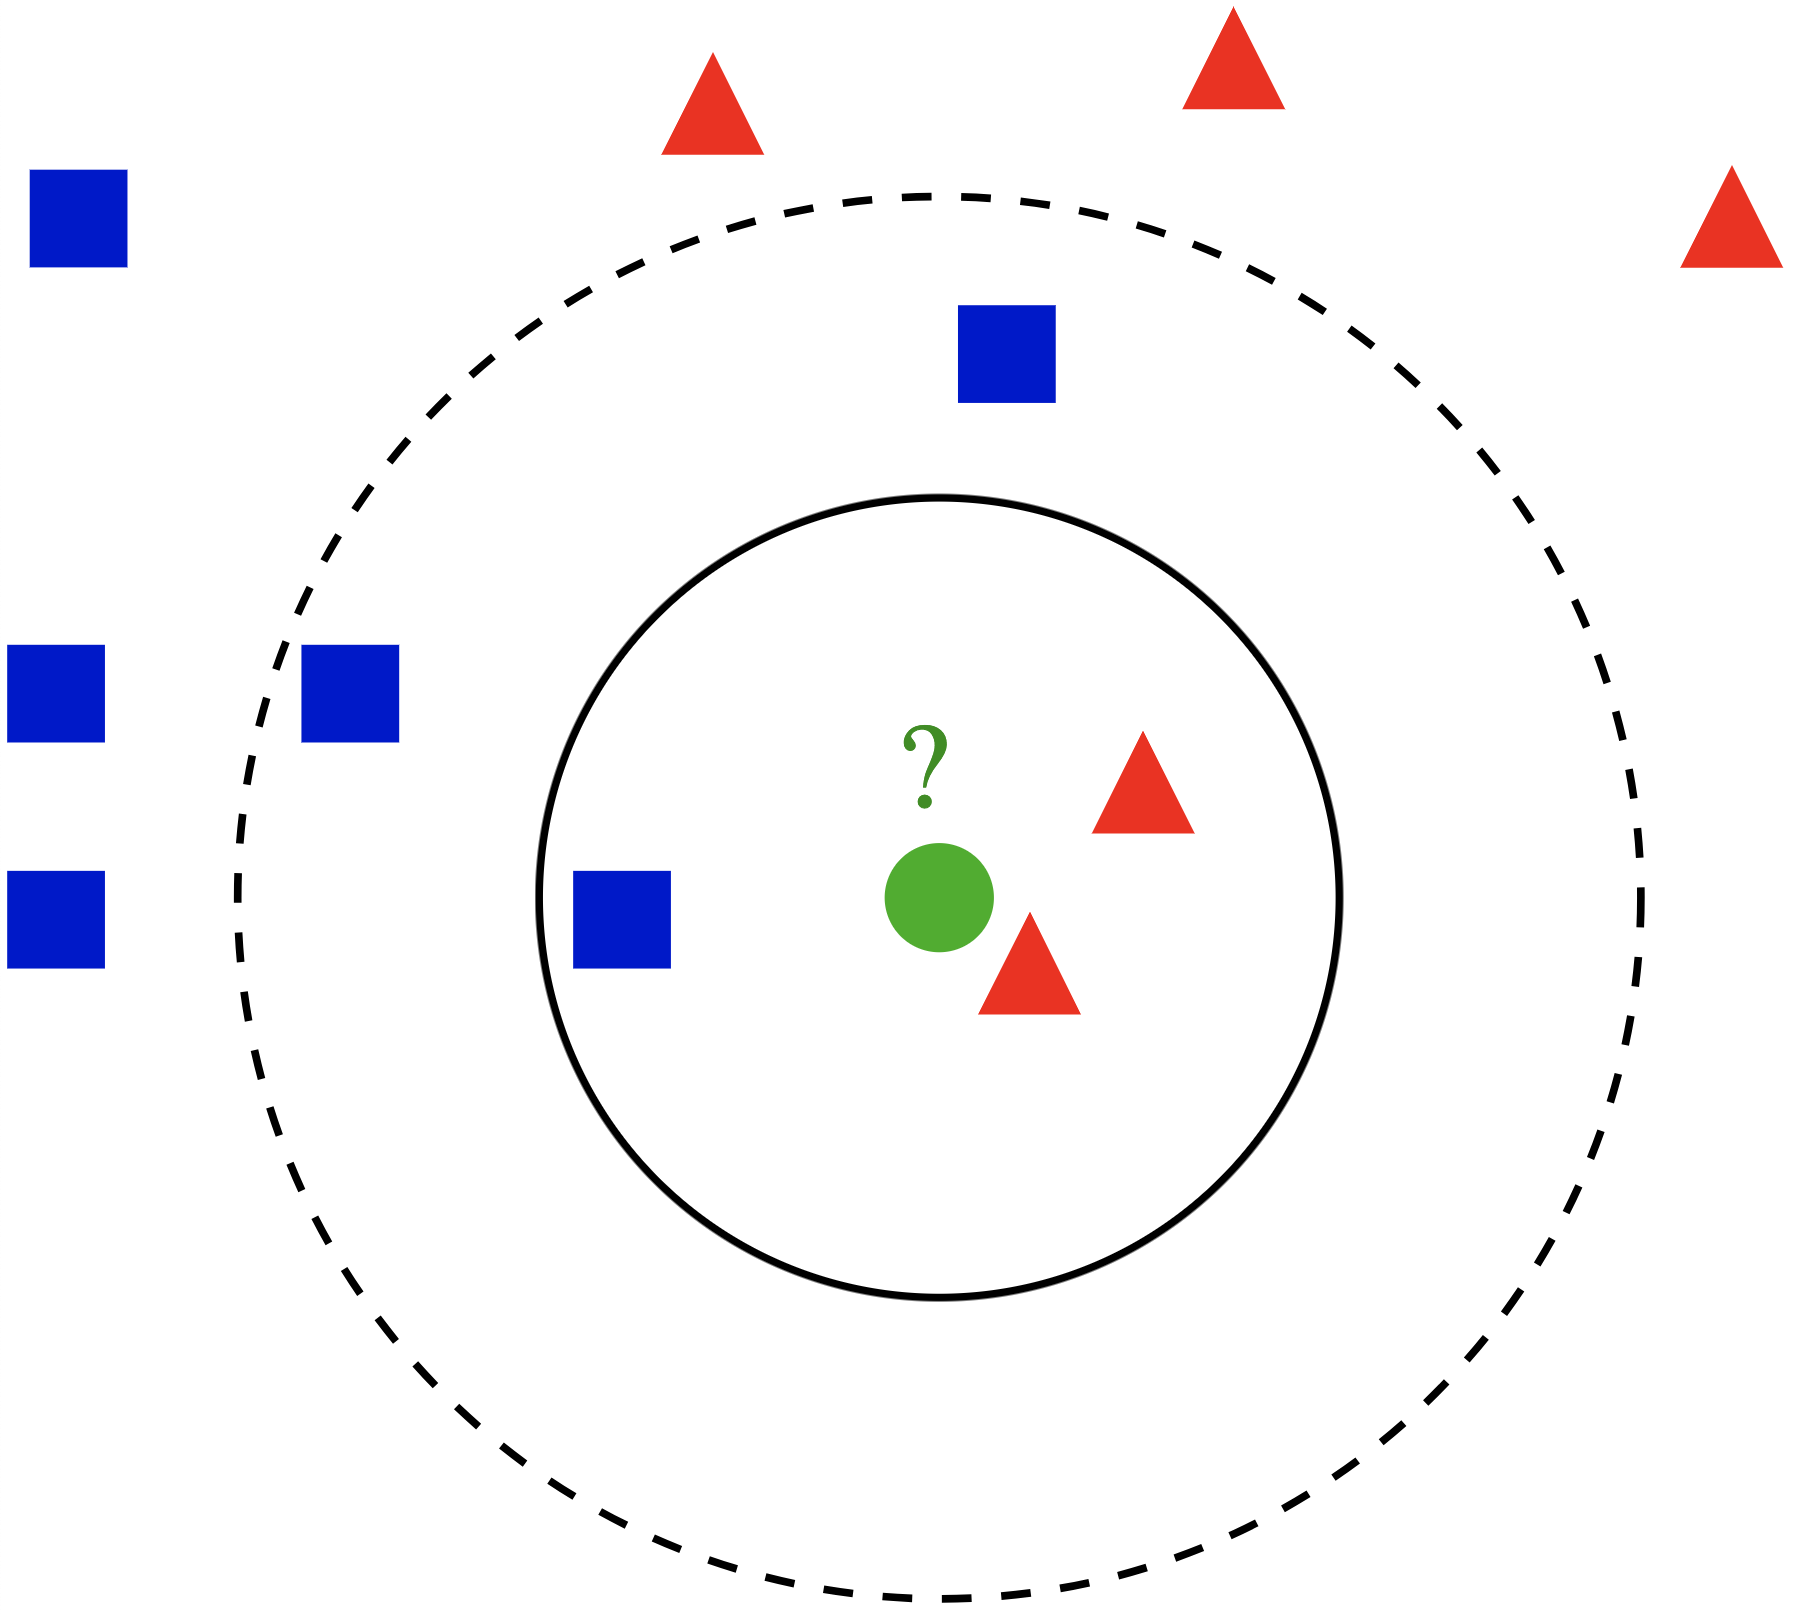

In [4]:
from IPython.display import Image
Image(filename='./assets/knn_illustration.png', width=500)

**_Instance of a K-NN classification_** 

- The test sample (the filled green circle), with unkown class belonging, shall be classified to either the class marked as blue squares or the class marked as red triangles, i.e. a **two-class problem** using K-NN.


- If $K = 3$ (circle drawn with black continuous line) the unkown observation will be assigned the **red triangle class** since there are two red-label samples and only one blue-label sample in the set consisting of the three closest neighbors being labeled (using the Eucledean distance metric).


- If, on the other hand, $K = 5$ (circle drawn with black dashed line) the previously unseen (i.e. not labeled) sample will be assigned the **blue square class** (three blue squares vs. two red triangles among the five closest samples being labeled), i.e. "majority voting". 


- K-NN is a _lazy learner_ because it doesn't learn a discriminative function from the training data but _"memorizes"_ the training dataset instead. For example, the logistic regression algorithm learns its model weights (parameters, $\theta$) during training time.


- For more elaborative explanation, see the Wikipedia entry for the [k-nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

### KNN-classification results superimposed on the FLASH channel

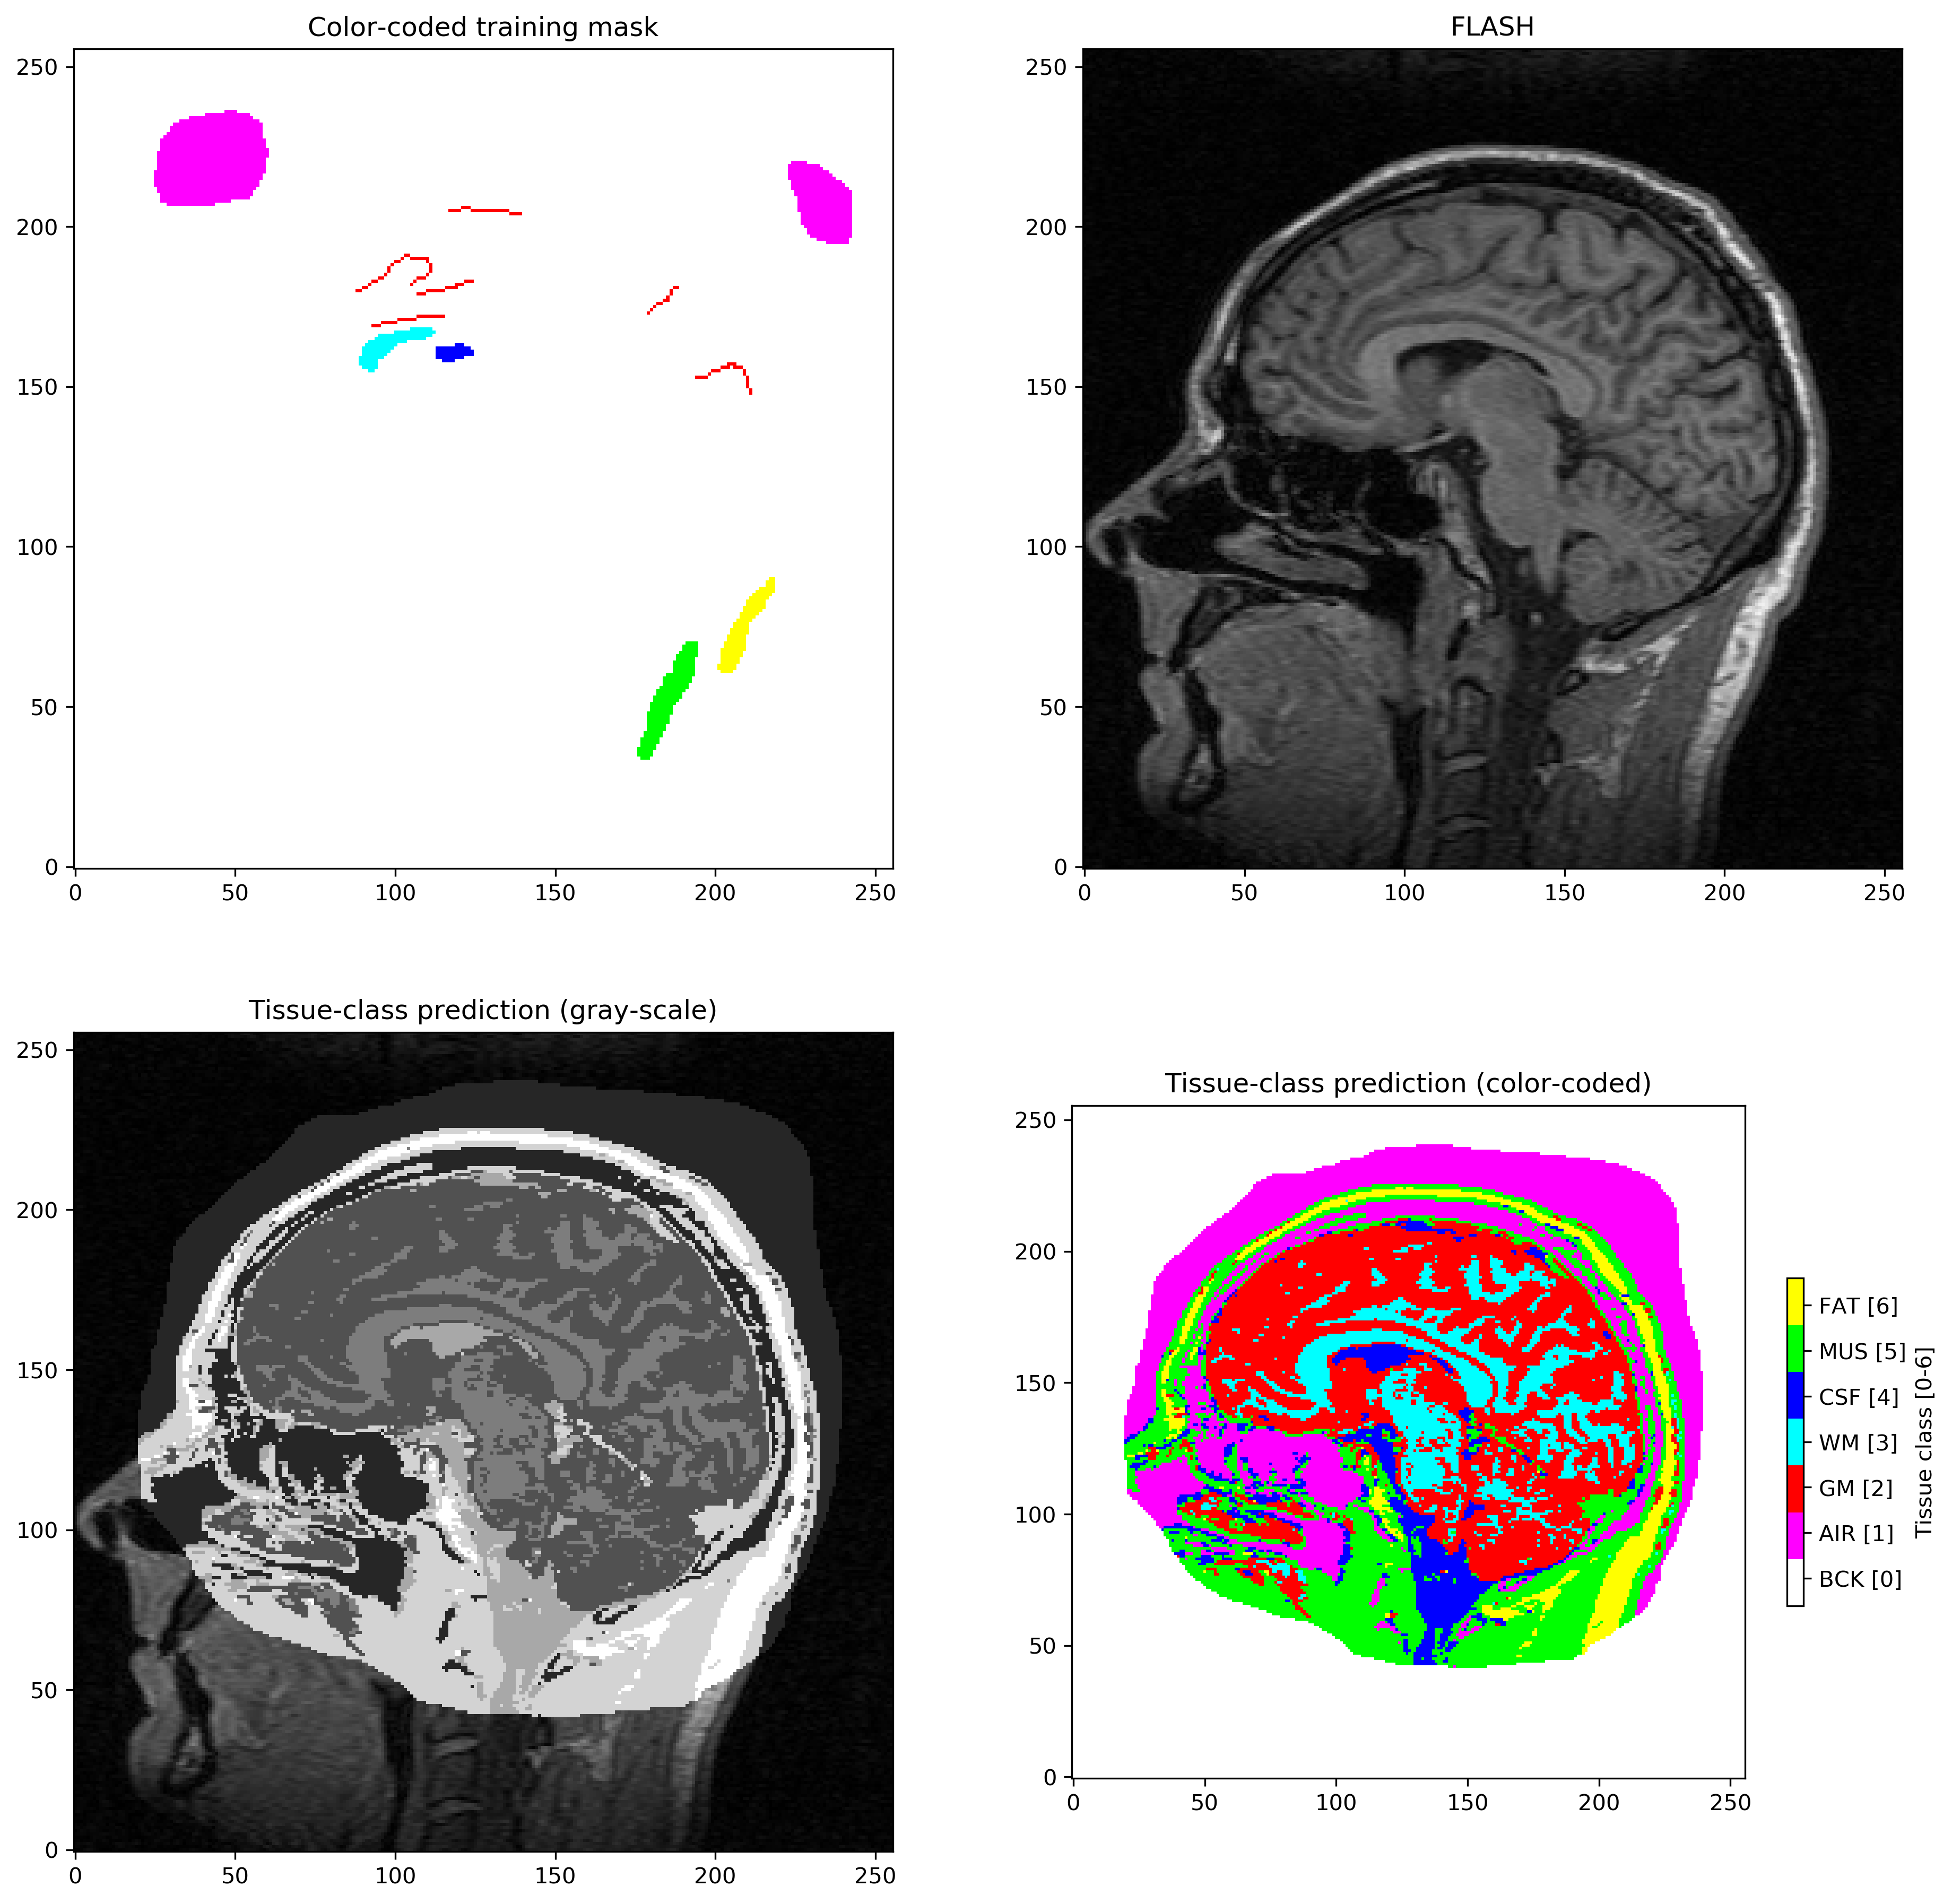

In [5]:
from IPython.display import Image
Image(filename='./assets/KNN_classification_results_on_flash.png', width=800)

## Unsupervised learning

**Unsupervised** learning is a branch of machine learning that learns from data that has not been labelled, classified, or categorized (as in **supervised** learning). Unsupervised learning identifies commonalities or previously unknown patterns in the data. The goal for unsupervised learning can be to model the underlying structure or distribution in the data in order to learn more about the data.

Using unsupervised learning to discover inherent groupings in the data is often denoted **clustering**, for which [K-means](https://en.wikipedia.org/wiki/K-means_clustering) is a prominent class of algorithms for splitting data into groups according to similarity, employing an iterative refinement technique to attain an optimal solution. This will also result in a partitioning of the data space into [Voronoi cells](https://en.wikipedia.org/wiki/Voronoi_diagram), that can be usede for cluster prediction of new data points.

## What is K-means?

Illustrative example adapted from: http://www.bigendiandata.com/2017-04-18-Jupyter_Customer360/ (Ian Downard)

[K-means clustering](https://en.wikipedia.org/wiki/Cluster_analysis) aims to group a set of **_objects_** with attributes (**_features_**) in such a way that objects in the same group (or cluster) are more **_similar_** to each other with respect to their attribute values than to objects in other groups. It operates on a table where every entry is an attribute value of a given object. <br>K-means only supports numeric attributes (columns). In python such table is often represented as a Pandas dataframe. A dataframe with two columns can easily be visualized as a scatterplot, where the x-axis is the first column (or attribute) and the y-axis is the second column. 

**For example, here’s a 2 dimensional scatterplot for a dataframe with two columns**

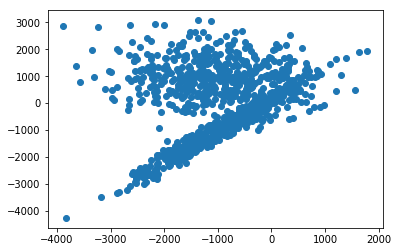

In [7]:
from IPython.display import Image
Image(filename='./assets/scatter-2d.png', width=500)

**If you were to manually group the data in the above graph, how would you do it?**<br>
    You might draw two circles, like this:

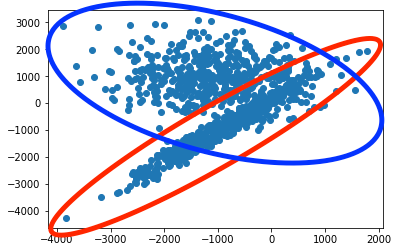

In [8]:
Image(filename='./assets/scatter-2d-circled.png', width=500)

**And in this case the grouping is pretty close to what you get through K-means -** <br>

where the following figure shows how the data is segmented by running K-means on our two dimensional dataset.**

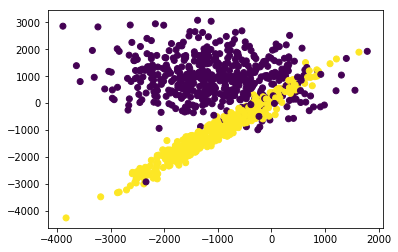

In [9]:
Image(filename='./assets/scatter-2d-segments.png', width=500)

### A real K-means example using synthetic data

(modified from the "Python Data Science Handbook" by Jake VanderPlas)

In [10]:
import os
home = os.path.expanduser('~')  # To make path to local home directory

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)

# Fit the K Means model
model = KMeans(4, random_state=0)
y = model.fit_predict(X)

In [12]:
centroids = model.cluster_centers_

**Plot the input data (without cluster labels)**

In [13]:
# Make a function for common plot formatting
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='black')
    ax.set_ylabel('feature 2', color='black')
    ax.set_title(title, color='black')

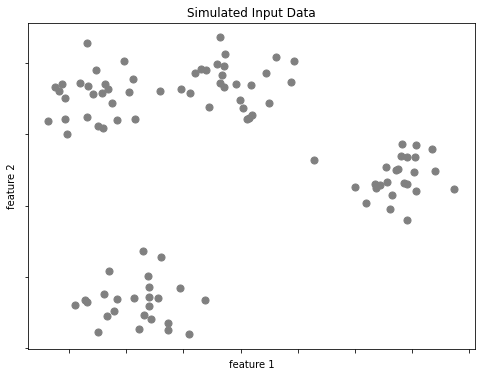

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

# format the plot
format_plot(ax, 'Simulated Input Data')

plt.show()
# fig.savefig('assets/k-means-clustering-1.png')

**Plot the data with color-coded cluster labels and star-shaped cluster centroids**

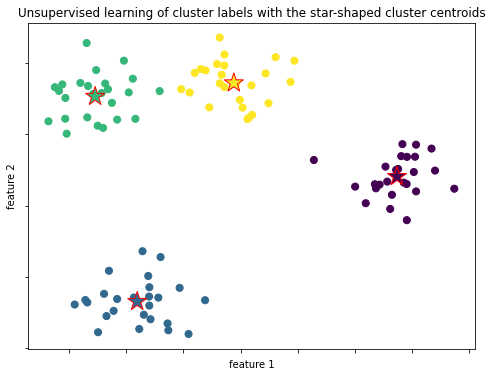

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=400, c=range(4), cmap='viridis', edgecolors = 'red')

# format the plot
format_plot(ax, 'Unsupervised learning of cluster labels with the star-shaped cluster centroids')

plt.show()
# fig.savefig('assets/k-means-clustering-2.png')

## Another example using synthetic 2D data of blobs
(modified from the book/GitHub repository by Aurélien Geron _Hands-On Machine Learning with Scikit-Learn and TensorFlow_ - https://github.com/ageron/handson-ml2)

In [16]:
from sklearn.datasets import make_blobs

In [17]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [18]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=42)

In [19]:
def plot_clusters(X, y=None):
    if y==None:
        plt.scatter(X[:, 0], X[:, 1], c='k', s=1)
    else:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=1)        
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=90)

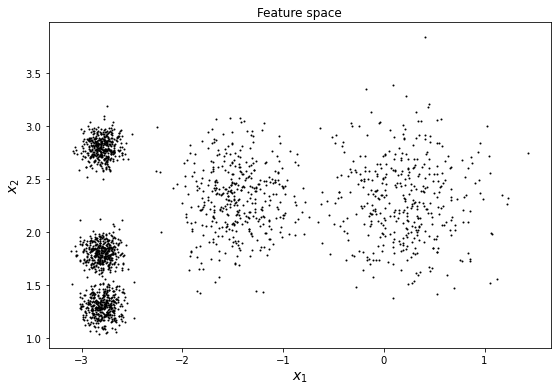

In [20]:
plt.figure(figsize=(9, 6))
plot_clusters(X)
plt.title('Feature space')
plt.show()

### Train a K-means classifier and predict data sample assignment

In [21]:
from sklearn.cluster import KMeans

In [22]:
K = 5
kmeans = KMeans(n_clusters=K, random_state=42)
y_pred = kmeans.fit_predict(X)

In [23]:
y_pred is kmeans.labels_

True

Each data sample was assigned to one of the K clusters. How to check cluster-wise belonging and cardinality of each cluster:

In [24]:
# Using np.bincount()
print(len(y_pred))
print(y_pred)
np.bincount(y_pred)

2000
[3 1 0 ... 1 3 4]


array([403, 392, 401, 403, 401])

In [25]:
# or, using collections and Counter (this behaves like a dictionary)
import collections
collections.Counter(y_pred)

Counter({3: 403, 1: 392, 0: 403, 2: 401, 4: 401})

In [26]:
# or, converting to a Pandas data frame and using value_counts()
import pandas as pd
import numpy as np

df = pd.DataFrame({'data': y_pred})
print(df['data'].value_counts())

3    403
0    403
4    401
2    401
1    392
Name: data, dtype: int64


In [27]:
# or, Pandas series
pd.Series(y_pred).value_counts()

3    403
0    403
4    401
2    401
1    392
dtype: int64

In [28]:
# or use np.unique()
uniq, cnts = np.unique(y_pred, return_counts=True)
print(uniq)
print(cnts)

[0 1 2 3 4]
[403 392 401 403 401]


In [29]:
# or, using dictionary comprehension
counts = {int(value): list(y_pred).count(value) for value in set(y_pred)}
print(counts)

{0: 403, 1: 392, 2: 401, 3: 403, 4: 401}


In [30]:
# or, using np.where()
n = {i:len([j for j in np.where(y_pred==i)[0]]) for i in set(y_pred)}
iy = {i:[j for j in np.where(y_pred==i)[0]] for i in set(y_pred)}
print(n)
# Cluster-wise sample assignments
#print(iy) 

{0: 403, 1: 392, 2: 401, 3: 403, 4: 401}


**The following K centroids (cluster centers) were estimated:**

In [31]:
kmeans.cluster_centers_

array([[-1.4464431 ,  2.32289002],
       [ 0.20712757,  2.30341652],
       [-2.79003304,  1.29770015],
       [-2.79846237,  2.80004584],
       [-2.80372723,  1.80873739]])

### We can also predict the labels (cluster belonging) of new instances:

In [32]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

### Visualizing the decision boundaries -  _Voronoi_ diagrams

Define initially some utility functions for plotting

In [33]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=90)
    else:
        plt.tick_params(labelleft=False)

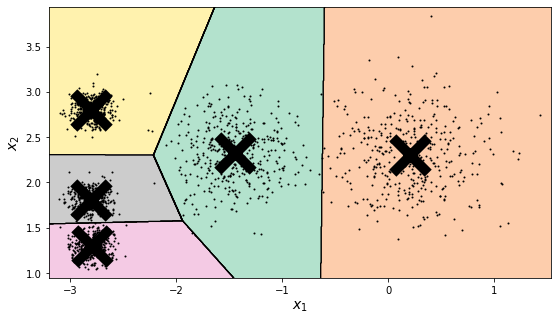

In [34]:
plt.figure(figsize=(9, 5))
plot_decision_boundaries(kmeans, X)
# Assuming you have made a subfolder prj/Sili-2020/results in your home catalogue (or adjust accordingly):
#plt.savefig('%s/prj/Seili-2020/results/kmeans_voronoi_plot.pdf' % (home), dpi=300)
plt.show()

### Using clustering for (color) image segmentation

In [36]:
from matplotlib.image import imread
image = imread(os.path.join("./data","ladybug.png"))
image.shape

(533, 800, 3)

In [37]:
%%time
X = image.reshape(-1, 3)
print(X.shape)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

(426400, 3)
CPU times: user 23.3 s, sys: 20 ms, total: 23.3 s
Wall time: 2.83 s


In [38]:
%%time
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

CPU times: user 1min 56s, sys: 551 ms, total: 1min 57s
Wall time: 12.3 s


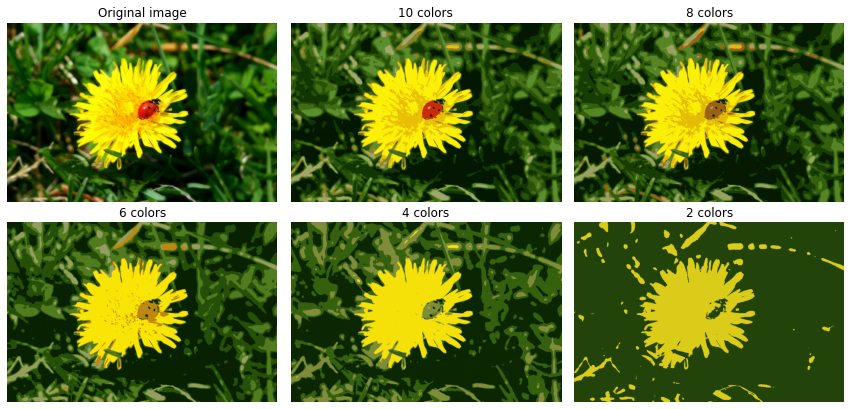

In [39]:
plt.figure(figsize=(15,7))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

# K-means clustring of MRI data set from the TCGA-GBM data collection 

## The TCGA-GBM data collection

https://wiki.cancerimagingarchive.net/display/Public/TCGA-GBM

The **Cancer Genome Atlas Glioblastoma Multiforme** (TCGA-GBM) data collection is part of a larger effort to build a research community focused on connecting cancer phenotypes to genotypes by providing clinical images matched to subjects from The Cancer Genome Atlas ([TCGA](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga)). 

Clinical, genetic, and pathological data resides in the [Genomic Data Commons (GDC) Data Portal](https://portal.gdc.cancer.gov/exploration?filters=%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.program.name%22%2C%22value%22%3A%5B%22TCGA%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.project_id%22%2C%22value%22%3A%5B%22TCGA-GBM%22%5D%7D%7D%5D%7D) while the radiological data is stored on The Cancer Imaging Archive ([TCIA](https://www.cancerimagingarchive.net)). 
Matched TCGA patient identifiers allow researchers to explore the TCGA/TCIA databases for correlations between tissue genotype, radiological phenotype and patient outcomes.  

Tissues for TCGA were collected from many sites all over the world in order to reach their accrual targets, usually around 500 specimens per cancer type.  For this reason the image data sets are also extremely heterogeneous in terms of scanner modalities, manufacturers and acquisition protocols.  In most cases the images were acquired as part of routine care and not as part of a controlled research study or clinical trial. 

#### CIP TCGA Radiology Initiative

Imaging Source Site (ISS) Groups are being populated and governed by participants from institutions that have provided imaging data to the archive for a given cancer type. Modeled after TCGA analysis groups, ISS groups are given the opportunity to publish a marker paper for a given cancer type per the guidelines in the table above. This opportunity will generate increased participation in building these multi-institutional data sets as they become an open community resource.  Learn more about the [TCGA Glioma Phenotype Research Group](https://wiki.cancerimagingarchive.net/display/Public/TCGA+Glioma+Phenotype+Research+Group).

### Citations & Data Useage Policy

Citations & Data Usage Policy 
Users of this data must abide by the [Creative Commons Attribution 3.0 Unported License](https://creativecommons.org/licenses/by/3.0) under which it has been published. Attribution should include references to the following citations:

**TCGA Attribution**

"The results [published or shown] here are in whole or part based upon data generated by the TCGA Research Network: http://cancergenome.nih.gov."

**Data Citation**

Scarpace, L., Mikkelsen, T., Cha, soonmee, Rao, S., Tekchandani, S., Gutman, D., … Pierce, L. J. (2016). Radiology Data from The Cancer Genome Atlas Glioblastoma Multiforme [TCGA-GBM] collection. The Cancer Imaging Archive. http://doi.org/10.7937/K9/TCIA.2016.RNYFUYE9


**TCIA Citation**

Clark K, Vendt B, Smith K, Freymann J, Kirby J, Koppel P, Moore S, Phillips S, Maffitt D, Pringle M, Tarbox L, Prior F. *The Cancer Imaging Archive (TCIA): Maintaining and Operating a Public Information Repository*, Journal of Digital Imaging, Volume 26, Number 6, December, 2013, pp 1045-1057. (paper DOI:10.1007/s10278-013-9622-7) [[link](https://link.springer.com/article/10.1007/s10278-013-9622-7)]

## The data set we will be using

We will be using a four-channel multispectral image (an axial slice from a multispectral 3D recording is shown below),  <br>
downloded from the TCGA-GBM data collection - i.e. study TCGA-06-1802.
The DICOM images were converted to NIFTI using the [dcm2niix](https://github.com/rordenlab/dcm2niix) software. 

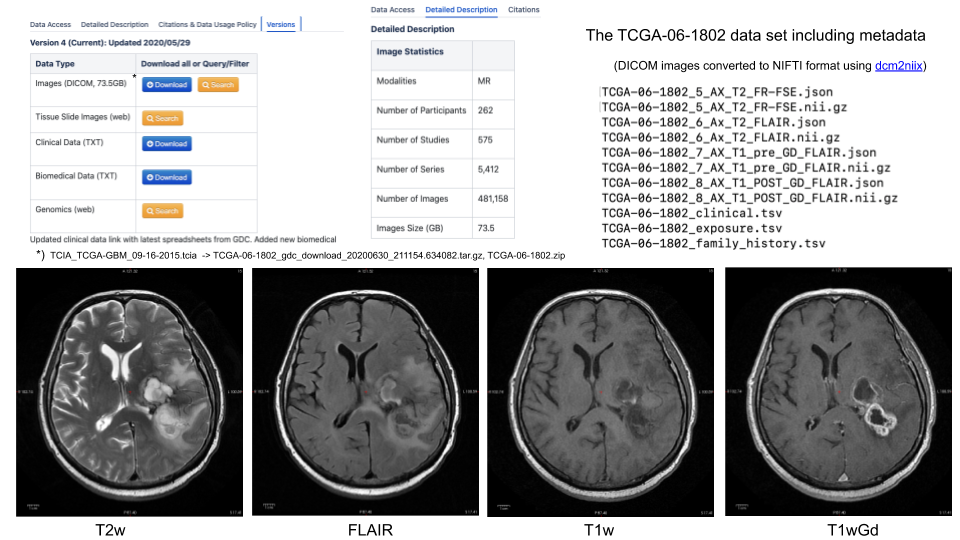

In [40]:
from IPython.display import Image
Image(filename='./assets/TCGA-GBM-dataset.png', width=900)

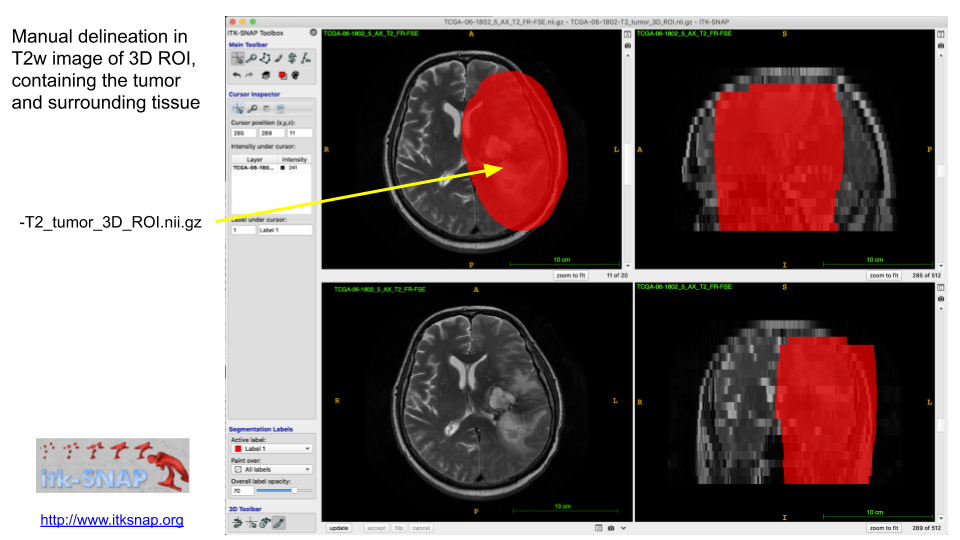

In [41]:
from IPython.display import Image
Image(filename='./assets/TCGA-GBM-dataset-3D-ROI.png', width=900)

**Import libraries to be used**

In [42]:
%matplotlib inline
# This to be able to display figures and graphs within the notebook browser

import os
import os.path as op
import pathlib
import glob
import shutil
import warnings
import numpy as np
import pandas as pd
import nibabel as nib
import scipy
import cv2
from nilearn import image
from nilearn import plotting
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn.image.image import mean_img
#import joblib
from sklearn.cluster import KMeans
from nilearn.masking import apply_mask
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
import IPython
home = os.path.expanduser('~')  # To make path to local home directory

**Define the channel names (MRI pulse sequence acronyms)**

In [43]:
chn_names = ['T2', 'FLAIR', 'T1', 'T1Gd']

## Read the multispectral MR image and the binary ROI mask

In [44]:
# Using nibabel to read the multispectral image (and the ROI mask)
base = './data/TCGA-06-1802/TCGA-06-1802'
fn_t2 = '%s_5_AX_T2_FR-FSE.nii.gz' % base
fn_flair = '%s_6_Ax_T2_FLAIR.nii.gz' % base
fn_t1 = '%s_7_AX_T1_pre_GD_FLAIR.nii.gz' % base
fn_t1gd = '%s_8_AX_T1_POST_GD_FLAIR.nii.gz' % base
fn_roi = '%s-T2_tumor_3D_ROI.nii.gz' % base

def load_chn(chn):
    img = nib.load(chn)
    return img

img_t2 = load_chn(fn_t2)
img_flair = load_chn(fn_flair)
img_t1 = load_chn(fn_t1)
img_t1gd = load_chn(fn_t1gd)
img_roi = load_chn(fn_roi)

**Print properties of the multispectral NIFTI image**

In [45]:
def img_prop(img, chn):
    print('**Channel image info %s:**' % (chn))
    print('shape of image = ', img.header.get_data_shape())
    print('voxel size = ', img.header.get_zooms())
    print('dtype = %s' % img.header.get_data_dtype())
    dat = img.get_fdata()
    print('min = %.1f' % dat.min())
    print('max = %.1f' % dat.max())
    print('number of slices =', img.shape[-1])
    # Collaps the singular (z-)dimension
    data = np.uint16(dat.squeeze())
    print('shape of data = ',data.shape)
    print('dtype of data = ',data.dtype)
    print('img affine:', img.affine)
    print('\n')
    
img_prop(img_t2, chn_names[0])
img_prop(img_flair, chn_names[1])
img_prop(img_t1, chn_names[2])
img_prop(img_t1gd, chn_names[3])

**Channel image info T2:**
shape of image =  (512, 512, 20)
voxel size =  (0.4297, 0.4297, 7.499882)
dtype = int16
min = 0.0
max = 1774.0
number of slices = 20
shape of data =  (512, 512, 20)
dtype of data =  uint16
img affine: [[-4.29655105e-01  4.23577521e-03 -7.92268217e-02  1.10343521e+02]
 [ 5.33721503e-03  4.12535071e-01 -2.09651637e+00 -6.90474243e+01]
 [-3.17350053e-03  1.20162129e-01  7.20045614e+00 -8.45515442e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


**Channel image info FLAIR:**
shape of image =  (512, 512, 25)
voxel size =  (0.4297, 0.4297, 5.9998765)
dtype = int16
min = 0.0
max = 1299.0
number of slices = 25
shape of data =  (512, 512, 25)
dtype of data =  uint16
img affine: [[-4.29655105e-01  4.23577521e-03 -6.33811504e-02  1.10350517e+02]
 [ 5.33721503e-03  4.12535071e-01 -1.67720497e+00 -6.88374176e+01]
 [-3.17350053e-03  1.20162129e-01  5.76033688e+00 -8.52715454e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


**PROBLEM: The 4 recordings have different number of slices and different slice thicknesses (the in-plane matrices and resolutions are the same)**

We do (behind the scene), using [FreeSurfer](https://surfer.nmr.mgh.harvard.edu)'s [`mri_convert`](https://surfer.nmr.mgh.harvard.edu/fswiki/mri_convert), coregistration of all channels to the T2 recording (which has also been used as the template for manual 3D ROI delineation of the tumor region and surroundings)

```
mri_convert TCGA-06-1802_6_Ax_T2_FLAIR.nii.gz TCGA-06-1802_6_Ax_T2_FLAIR_to_T2.nii.gz --like TCGA-06-1802_5_AX_T2_FR-FSE.nii.gz

mri_convert TCGA-06-1802_7_AX_T1_pre_GD_FLAIR.nii.gz TCGA-06-1802_7_AX_T1_pre_GD_FLAIR_to_T2.nii.gz --like TCGA-06-1802_5_AX_T2_FR-FSE.nii.gz

mri_convert TCGA-06-1802_8_AX_T1_POST_GD_FLAIR.nii.gz TCGA-06-1802_8_AX_T1_POST_GD_FLAIR_to_T2.nii.gz  --like TCGA-06-1802_5_AX_T2_FR-FSE.nii.gz
```

**Using the coregistred channel images to construct a multispectral image**

In [46]:
fn_flair_to_t2 = '%s_6_Ax_T2_FLAIR_to_T2.nii.gz' % base
fn_t1_to_t2 = '%s_7_AX_T1_pre_GD_FLAIR_to_T2.nii.gz' % base
fn_t1gd_to_t2 = '%s_8_AX_T1_POST_GD_FLAIR_to_T2.nii.gz' % base

img_flair_to_t2 = load_chn(fn_flair_to_t2)
img_t1_to_t2 = load_chn(fn_t1_to_t2)
img_t1gd_to_t2 = load_chn(fn_t1gd_to_t2)

Checking for geomtric alignment:

In [47]:
img_prop(img_t2, chn_names[0])
img_prop(img_flair_to_t2, chn_names[1])
img_prop(img_t1_to_t2, chn_names[2])
img_prop(img_t1gd_to_t2, chn_names[3])

**Channel image info T2:**
shape of image =  (512, 512, 20)
voxel size =  (0.4297, 0.4297, 7.499882)
dtype = int16
min = 0.0
max = 1774.0
number of slices = 20
shape of data =  (512, 512, 20)
dtype of data =  uint16
img affine: [[-4.29655105e-01  4.23577521e-03 -7.92268217e-02  1.10343521e+02]
 [ 5.33721503e-03  4.12535071e-01 -2.09651637e+00 -6.90474243e+01]
 [-3.17350053e-03  1.20162129e-01  7.20045614e+00 -8.45515442e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


**Channel image info FLAIR:**
shape of image =  (512, 512, 20)
voxel size =  (0.4297, 0.4297, 7.499882)
dtype = int16
min = 0.0
max = 1217.0
number of slices = 20
shape of data =  (512, 512, 20)
dtype of data =  uint16
img affine: [[-4.29655105e-01  4.23577521e-03 -7.92268217e-02  1.10343521e+02]
 [ 5.33721503e-03  4.12535071e-01 -2.09651637e+00 -6.90474243e+01]
 [-3.17350077e-03  1.20162129e-01  7.20045662e+00 -8.45515442e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]



**Concatenate the cannel images to one multispectral image using [`nilearn.image.concat_imgs`](https://nilearn.github.io/modules/generated/nilearn.image.concat_imgs.html)**

In [48]:
images = [img_t2, img_flair_to_t2, img_t1_to_t2, img_t1gd_to_t2]
img_mult = image.concat_imgs(images)
img_prop(img_mult, 'multispectral')

**Channel image info multispectral:**
shape of image =  (512, 512, 20, 4)
voxel size =  (0.4297, 0.4297, 7.499882, 3.4)
dtype = int16
min = 0.0
max = 2147.0
number of slices = 4
shape of data =  (512, 512, 20, 4)
dtype of data =  uint16
img affine: [[-4.29655105e-01  4.23577521e-03 -7.92268217e-02  1.10343521e+02]
 [ 5.33721503e-03  4.12535071e-01 -2.09651637e+00 -6.90474243e+01]
 [-3.17350053e-03  1.20162129e-01  7.20045614e+00 -8.45515442e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]




In [49]:
dat = img_mult.get_fdata()
data = np.uint16(dat.squeeze())
data.shape

(512, 512, 20, 4)

**Display the multispectral MR image**

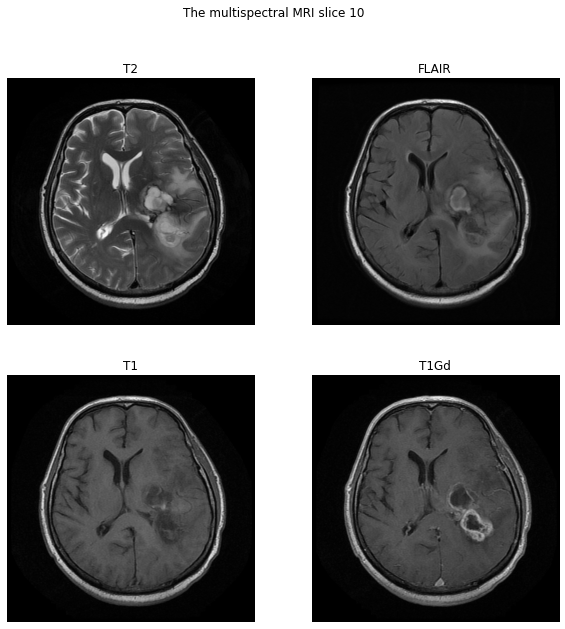

In [50]:
sl = 10
fig, axes = plt.subplots(2,2, figsize=(10,10))
ax = axes.ravel()
for k, ch in enumerate(chn_names):
    ax[k].imshow(data[:, :, sl, k].T, cmap='gray', origin='lower')
    ax[k].set_title(ch)
    ax[k].set(xlabel="")
    ax[k].axis('off')
plt.suptitle('The multispectral MRI slice %d' % sl) 
plt.tight_layout
plt.show()

**Get the ROI mask data**

In [51]:
msk = img_roi.get_fdata()
mask = np.uint16(msk.squeeze())
mask.shape

(512, 512, 20)

**Display the multispectral MR image with the superimposed ROI mask for different slices**

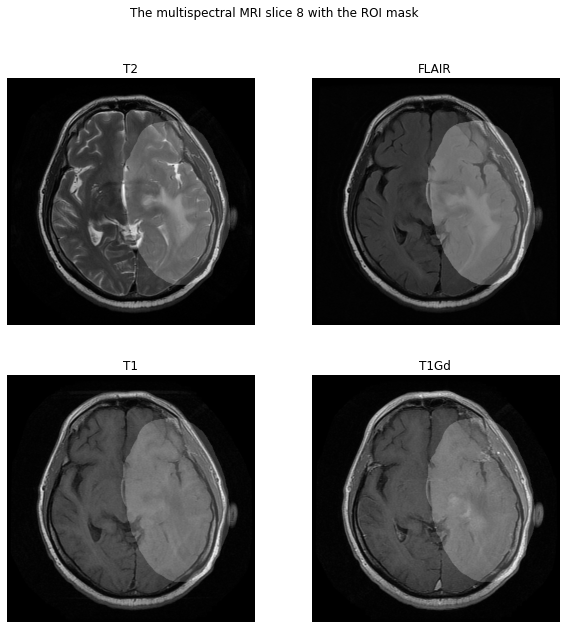

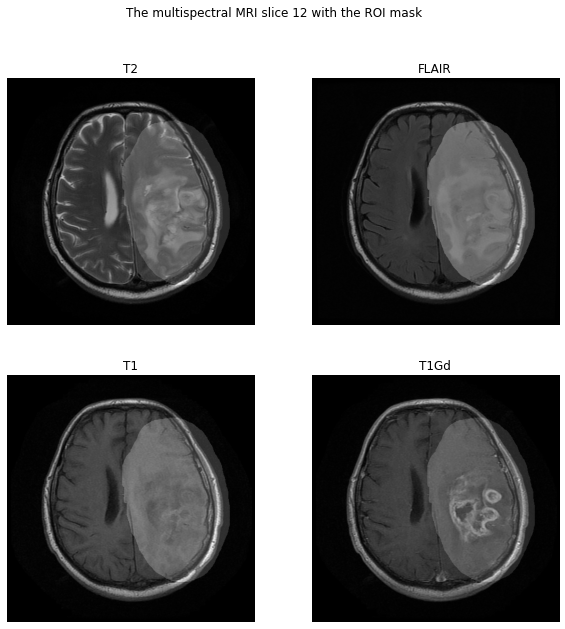

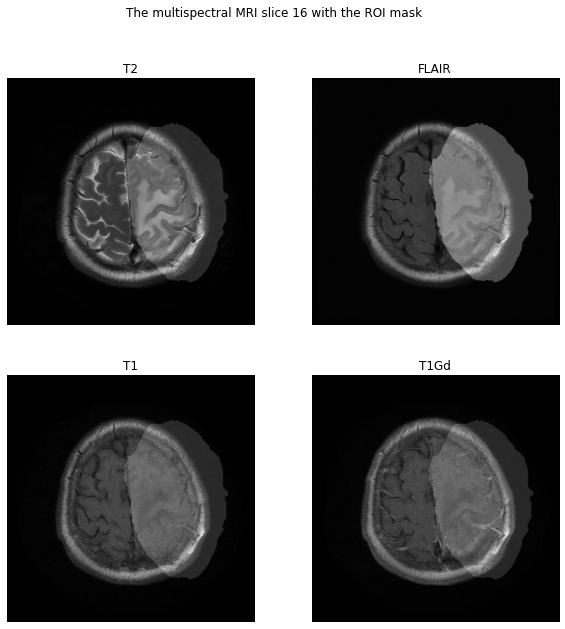

In [52]:
sl = 8
fig, axes = plt.subplots(2,2, figsize=(10,10))
ax = axes.ravel()
for k, ch in enumerate(chn_names):
    ax[k].imshow(data[:, :, sl, k].T + 300*mask[:,:,sl].T, cmap='gray', origin='lower')
    ax[k].set_title(ch)
    ax[k].set(xlabel="")
    ax[k].axis('off')
plt.suptitle('The multispectral MRI slice %d with the ROI mask' % sl) 
plt.tight_layout
plt.show()

sl = 12
fig, axes = plt.subplots(2,2, figsize=(10,10))
ax = axes.ravel()
for k, ch in enumerate(chn_names):
    ax[k].imshow(data[:, :, sl, k].T + 300*mask[:,:,sl].T, cmap='gray', origin='lower')
    ax[k].set_title(ch)
    ax[k].set(xlabel="")
    ax[k].axis('off')
plt.suptitle('The multispectral MRI slice %d with the ROI mask' % sl) 
plt.tight_layout
plt.show()

sl = 16
fig, axes = plt.subplots(2,2, figsize=(10,10))
ax = axes.ravel()
for k, ch in enumerate(chn_names):
    ax[k].imshow(data[:, :, sl, k].T + 300*mask[:,:,sl].T, cmap='gray', origin='lower')
    ax[k].set_title(ch)
    ax[k].set(xlabel="")
    ax[k].axis('off')
plt.suptitle('The multispectral MRI slice %d with the ROI mask' % sl) 
plt.tight_layout
plt.show()


> # Start your experiments here:
Make a copy of the original notebook ( File -> Make a Copy ) and name it<br> e.g. 
`my_03-mri-kmeans-brain-tumor.ipynb`

## $\rightarrow$ Your turn!
-  We have now repeated code for 4 very similar figures with a 2x2 display panel of axial slice images
-  Try to make a function:

```
def display_multispectral_image(data, mask, slice, scale = 300):
    """
    data  - 4D multispectral image data
    mask  - 3D ROI mask
    slice - slice number to be displayed
    scale - scaling factor for the superposition of the 0/1 ROI tumor mask (default value 300)
    """
    < continue your code here >

```
and call the function with e.g.
```
display_multispectral_image(data, mask, 9, )
```

and try the function's help(), i.e.
```
help(display_multispectral_image)
```

In [53]:
# Your code here


### Constructing a Pandas data frame from the MRI data (img_mult) and the ROI mask (img_roi)

Find all pixel locations in the ROI for extracting a dataset X and corresponding pixel locations to a Pandas data frame (dfT)

In [54]:
# Find pixel locations (ind_roi) corresponding to tumor ROI (value 1 inside ROI, 0 else) 
ind_roi = np.where(mask == 1) 
X = np.asarray(data[ind_roi[0][:],ind_roi[1][:],ind_roi[2][:],:]) # The multispectral signal intensities
X.shape

(962086, 4)

In [55]:
ind_roi

(array([234, 234, 234, ..., 460, 460, 460]),
 array([289, 290, 291, ..., 240, 240, 240]),
 array([ 9,  9,  9, ...,  9, 10, 11]))

**Construct the multimodal "tumor" data frame, dfT**

In [56]:
dfT = pd.DataFrame(X, columns = chn_names)

# Add the voxel coordinates
dfT.insert(loc = len(dfT.columns),
           column = 'row',
           value = ind_roi[0])  # Row of pixel location
dfT.insert(loc = len(dfT.columns),
           column = 'col',
           value = ind_roi[1])  # Col of pixel location
dfT.insert(loc = len(dfT.columns),
           column = 'sli',
           value = ind_roi[2])  # Slice of pixel location

In [57]:
dfT.head()

T2  FLAIR   T1  T1Gd  row  col  sli
0  296    269  559   578  234  289    9
1  313    269  554   570  234  290    9
2  380    294  549   530  234  291    9
3  452    333  540   494  234  292    9
4  472    349  506   501  234  293    9

In [58]:
dfT.tail()

T2  FLAIR  T1  T1Gd  row  col  sli
962081  16     16  36    43  460  239   10
962082  28     16  31    46  460  239   11
962083  21     16  23    49  460  240    9
962084  14     13  36    39  460  240   10
962085  26     12  24    33  460  240   11

**Find the min an max slice in the ROI**

In [59]:
print('ROI min slice and max slice:', dfT.sli.min(), ',', dfT.sli.max())

ROI min slice and max slice: 0 , 18


### OPTIONAL: Scaling* of feature vectors  (MRI signal inensity), channel-by-channel wthin the ROI mask

*) Scaling to zero mean and unit standard deviation

In [60]:
scaler = StandardScaler()  
scaler.fit(X.astype(float))

X_scaled = scaler.transform(X.astype(float))  

# Make data frame from scaled X_train og y_train to check scaling
dX_scaled = pd.DataFrame(X_scaled, columns=chn_names)
dy = pd.concat([dfT.row, dfT.col, dfT.sli], axis=1)
X_scaled = pd.concat([dX_scaled, dy], axis=1)
X_scaled.head()

T2     FLAIR        T1      T1Gd  row  col  sli
0 -0.387614  0.280994  0.650839  0.515233  234  289    9
1 -0.315005  0.280994  0.626753  0.479153  234  290    9
2 -0.028841  0.475690  0.602667  0.298754  234  291    9
3  0.278679  0.779415  0.559312  0.136394  234  292    9
4  0.364101  0.904020  0.395526  0.167964  234  293    9

In [61]:
X_scaled.describe(percentiles = [0.5]).round(4).T

count      mean      std       min       50%       max
T2     962086.0    0.0000   1.0000   -1.6519    0.0096    5.9251
FLAIR  962086.0   -0.0000   1.0000   -1.8061    0.1252    6.9396
T1     962086.0    0.0000   1.0000   -2.0420    0.1258    6.4123
T1Gd   962086.0    0.0000   1.0000   -2.0870    0.0687    7.5914
row    962086.0  348.6257  52.7946  234.0000  348.0000  460.0000
col    962086.0  252.7923  83.5786   82.0000  253.0000  422.0000
sli    962086.0    8.3885   4.9299    0.0000    8.0000   18.0000

## Unsupervised classification of multispectral MRI using K-means

In [62]:
X.shape  # n x p data matrix, n=samples, p = feature vector dimension

(962086, 4)

### Clustering the 4D multispectral data within the ROI mask 
####  LATER: _play with different values of `K`, `max_iter` and `tol`_

In [63]:
%%time
K = 7  # Number of clusters
max_iter = 300 # Max number of iteration
tol = 0.0001 # Tolerance
kmeans_model = KMeans(n_clusters=K, random_state=42, max_iter=max_iter, tol=tol)
print(kmeans_model)

KMeans(n_clusters=7, random_state=42)
CPU times: user 655 µs, sys: 9 µs, total: 664 µs
Wall time: 493 µs


In [64]:
%%time
# Fit the K-means model to the data
kmeans_fit = kmeans_model.fit(X)

CPU times: user 1min 30s, sys: 28.5 s, total: 1min 58s
Wall time: 7.82 s


In [65]:
print(kmeans_fit.labels_)
print('First centroid in p-dimensional feature vector space:\n', kmeans_fit.cluster_centers_[0,:])

[3 3 3 ... 4 4 4]
First centroid in p-dimensional feature vector space:
 [807.5701218  557.71715703 942.51080146 922.57430705]


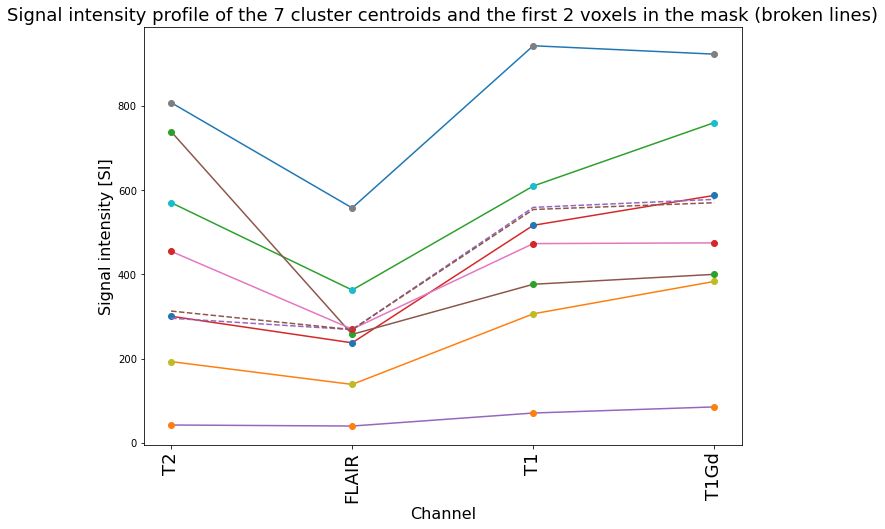

In [66]:
# Plot the cluster centroids as line plots

nv = 2

fig, ax = plt.subplots(1,1)

fig.set_size_inches(10, 7)

plt.plot(kmeans_fit.cluster_centers_.T)
plt.plot(kmeans_fit.cluster_centers_.T, 'o')
plt.plot(X[:nv, :].T, '--')
plt.xlabel('Channel', fontsize=16)
ax.set_xticks([x for x in range(len(chn_names))])
ax.set_xticklabels(chn_names, rotation='vertical', fontsize=18)
plt.ylabel('Signal intensity [SI]', fontsize=16)
#plt.xlim(0, 3)
plt.title('Signal intensity profile of the %d cluster centroids and the first %d voxels in the mask (broken lines)' % (K, nv), fontsize=18)

plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

plt.show()

**OPTIONAL:** Fit the K-means model to the scaled data

In [67]:
# Fit the K-means model to the scaled data
# kmeans_model_scaled = KMeans(n_clusters=K, random_state=42)
# kmeans_fit_scaled = kmeans_model_scaled.fit(X_scaled)

In [68]:
# print(kmeans_fit_scaled.labels_)
# print('First centroid in scaled p-dimensional feature vector space:\n', kmeans_fit_scaled.cluster_centers_[0,:])

#### Make a k-means segmented image (segmentation restricted to the ROI)

In [69]:
kmeans_segm = 0 * mask.copy()
print('Size of segmented image:', kmeans_segm.shape)
print('min:', kmeans_fit.labels_.min())
print('max:', kmeans_fit.labels_.max())
print('Number of clustered samples within ROI:', len(ind_roi[0]))

Size of segmented image: (512, 512, 20)
min: 0
max: 6
Number of clustered samples within ROI: 962086


#### Assign the cluster belonging to each voxel within the ROI

In [70]:
for v in range(len(ind_roi[0])):
    kmeans_segm[ind_roi[0][v], ind_roi[1][v], ind_roi[2][v]] = kmeans_fit.labels_[v]

**and dsiplay the result (comparing with the FLASH channel)**

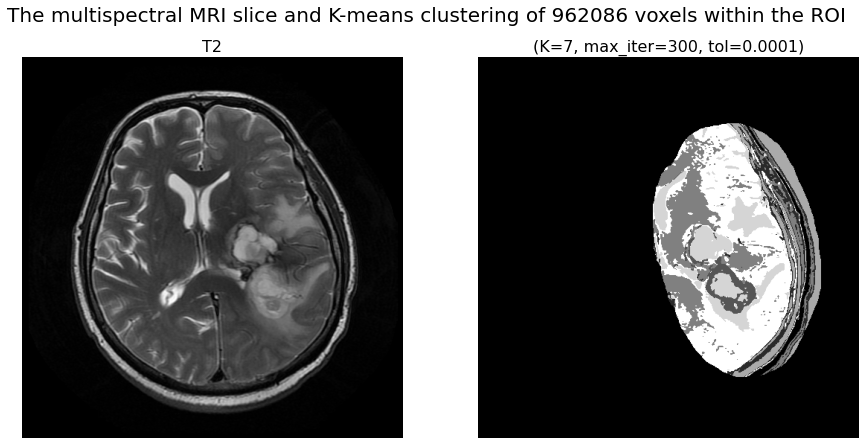

In [71]:
sl = 10
chn = 0
fig, axes = plt.subplots(1,2, figsize=(15,7))
ax = axes.ravel()
ax[0].imshow(data[:, :, sl, chn].T, cmap='gray', origin='lower')
ax[0].set_title(chn_names[chn], fontsize=16)
ax[0].set(xlabel="")
ax[0].axis('off')
ax[1].imshow(kmeans_segm[:, :, sl].T, cmap='gray', origin='lower')
ax[1].set_title('(K=%d, max_iter=%d, tol=%.4f)' % (K, max_iter, tol), fontsize=16)
ax[1].axis('off')
plt.suptitle('The multispectral MRI slice and K-means clustering of %d voxels within the ROI' % (X.shape[0]), fontsize=20) 
plt.tight_layout
plt.show()

**Design a new [colormap](https://matplotlib.org/tutorials/colors/colormap-manipulation.html) for the clustering, using [named colors](https://matplotlib.org/examples/color/named_colors.html) and gray levels, a colorcode 
[dictionary](https://www.geeksforgeeks.org/python-dictionary)**

In [72]:
import matplotlib
col_code = {
    'CLU0': [255,255,255], # White (background)
    'CLU1': [255,0,255],   # Magenta 
    'CLU2': [255,0,0],     # Red 
    'CLU3': [0,255,255],   # Cyan 
    'CLU4': [0,0,255],     # Blue 
    'CLU5': [0,255,0],     # Green 
    'CLU6': [255,255,0],   # Yellow 
    'CLU7': [10,10,10],    # Gray levels
    'CLU8': [20,20,20],    
    'CLU10': [40,40,40],
    'CLU11': [80,80,80],     
    'CLU12': [120,120,120],     
    'CLU13': [150,150,150],        
    'CLU14': [180,180,180],  
    'CLU15': [200,200,200]  
}
clu_names = list(col_code.keys())
nclu = len(clu_names)
colors = np.array(list(col_code.values()))/255   # scale to interval 0-1
mycmap = matplotlib.colors.ListedColormap(colors)
clu_cmap = matplotlib.cm.get_cmap(mycmap, nclu)   # nclu discrete colors

In [73]:
clu_names_num = []
for i in range(nclu):
    str = clu_names[i] + ' [%d]' % (i)
    clu_names_num.append(str)

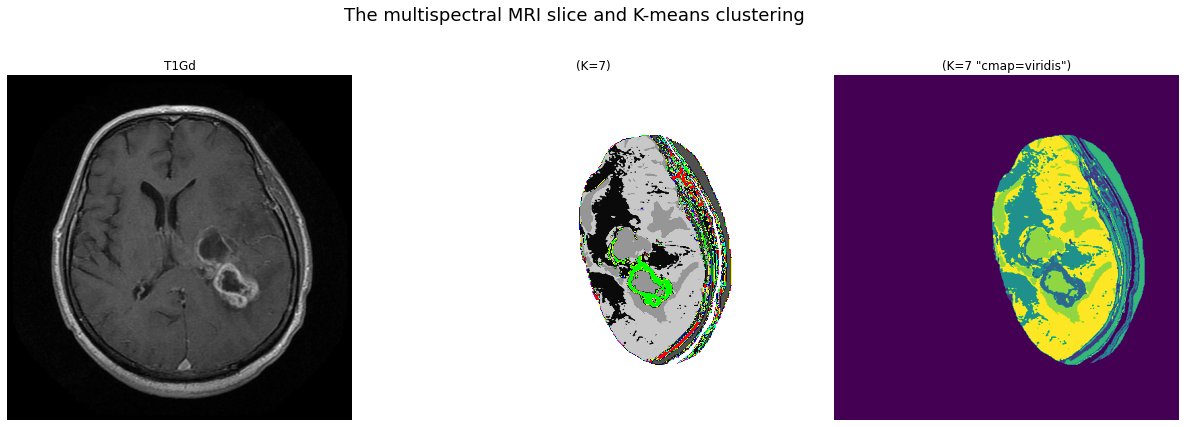

In [74]:
sl = 10
chn = 3
fig, axes = plt.subplots(1,3, figsize=(21,7))
ax = axes.ravel()
ax[0].imshow(data[:, :, sl, chn].T, cmap='gray', origin='lower')
ax[0].set_title(chn_names[chn])
ax[0].set(xlabel="")
ax[0].axis('off')
ax[1].imshow(kmeans_segm[:, :, sl].T, cmap=clu_cmap, origin='lower')
#ax[1].imshow(kmeans_segm[:, :].T, cmap='viridis', origin='lower')
#cmsk = ax[1].imshow(kmeans_segm[:, :].T, cmap=clu_cmap, origin='lower')
#clim=cmsk.properties()['clim']
#cbar = fig.colorbar(cmsk, shrink=0.4, label='Cluster [0-%d]' % clim[1])
#cbar.ax.set_yticklabels(clu_names_num)
ax[1].set_title('(K=%d)' % (K))
ax[1].axis('off')
ax[2].imshow(kmeans_segm[:, :, sl].T, cmap='viridis', origin='lower')
ax[2].set_title('(K=%d "cmap=viridis")' % (K))
ax[2].axis('off')
plt.suptitle("The multispectral MRI slice and K-means clustering", fontsize=18) 
plt.tight_layout
plt.show()

In [75]:
# Save the K-means clustering result (K=7) to disk as a 3D NIFTI image
#  nibabel.save() does not allow me to have dot . or dash - in the folder names. 
#  These can exist in filenames however. 
clu_img = nib.Nifti1Image(kmeans_segm, img_t2.affine)
nib.save(clu_img, 'data/TCGA-06-1802-K-means-%d-ROI.nii.gz' % K)
#os.rename('data/TCGA-06-1802-K-means-%d-ROI.nii.gz' % K, 'data/TCGA-06-1802/TCGA-06-1802-K-means-%d-ROI.nii.gz' % K)

## $\rightarrow$ Your turn!
-  Try to interpret the unsupervised segmentation (color-coded ROI), here K=7
-  Explore different slices and different channels
-  You can also load the channel image(s) into ITK-SNAP and the TCGA-06-1802-K-means-7-ROI.nii.gz as a segmentation


### 3D scatterplot of clustered (color-coded) featurs vectors and the cluster centroids in 3D feature space

https://stackoverflow.com/questions/38364435/python-matplotlib-make-3d-plot-interactive-in-jupyter-notebook <br>
Using the [magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html) `%matplotlib notebook` instead of `%matplotlib inline`

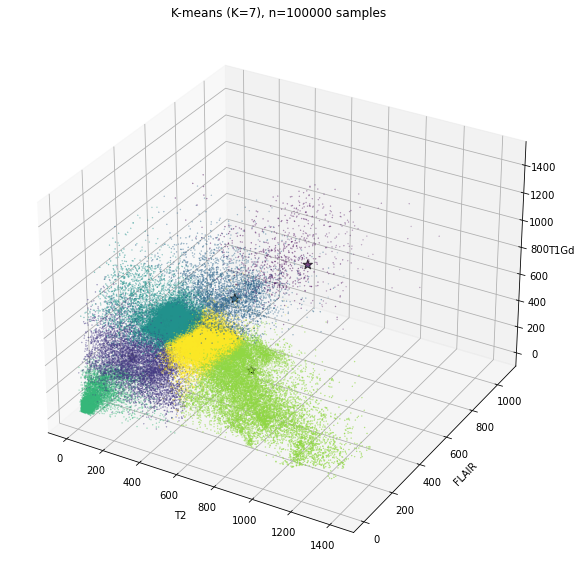

In [76]:
%matplotlib inline
# %matplotlib notebook

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111, projection='3d')

n=100000

xs = X[:n,0]
ys = X[:n,1]
zs = X[:n,3]
c = kmeans_fit.labels_[:n]

ax.scatter(xs, ys, zs, c=c, marker='.', s=0.5)

cxs = kmeans_fit.cluster_centers_[:,0]
cys = kmeans_fit.cluster_centers_[:,1]
czs = kmeans_fit.cluster_centers_[:,3]
cc = range(K)

ax.scatter(cxs, cys, czs, c=cc, marker='*', s=100,  edgecolors = 'black')


ax.set_xlabel(chn_names[0])
ax.set_ylabel(chn_names[1])
ax.set_zlabel(chn_names[3])

plt.title('K-means (K=%d), n=%d samples' % (K, len(xs)))
plt.show() 

## $\rightarrow$ Your turn!
> ## - Play with different values of `K`  (e.g. K=2, ...., 32)
> ## - Try to make biological (or MRI technical) interpretation of the clusters
> ## - Why does the K-means algorithm take longer to converge with increasing K ?
> ## - What does `random_state` do ?
> ## - Play with different values of `max_iter` and `tol` (explain your findings)
> ## - Could you make use of clustering in supervised classification ??
